# Practical Assignment: House Pricing

The objective of this assignment is to use linear regression to predict house prices using the data set.

In [67]:
# used for manipulating directory paths
import os
# Scientific and vector computation for python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Plotting library
from matplotlib import pyplot
# tells matplotlib to embed plots within the notebook
%matplotlib inline

<a id="section1"></a>
## Load data using pandas into a data frame 

In [68]:
Hdata_complete = pd.read_csv("house_data_complete.csv")
# disregard unimportant features as ID and date  
complete = Hdata_complete.iloc[:, 2:]
#complete = complete.drop(['zipcode'], axis=1)
#complete = complete.drop(['lat'], axis=1)
#complete = complete.drop(['long'], axis=1)
#print(complete)

#yr_renovated       5502.402490
#zipcode          -25967.704940
#lat               84982.579581
#long             -28755.260527

<a id="section2"></a>
### Clean data set

In [69]:
#Drop the rows where at least one element is missing.
features = complete.iloc[:,1:]
prices = complete.iloc[:,0]
features.dropna()
print("bedrooms NA",features['bedrooms'].isnull().sum())
print("bathrooms NA",features['bathrooms'].isnull().sum())
print("sqft_living NA",features['sqft_living'].isnull().sum())
print("sqft_lot NA",features['sqft_lot'].isnull().sum())
print("floors NA",features['floors'].isnull().sum())
print("waterfront NA",features['waterfront'].isnull().sum())
print("view NA",features['view'].isnull().sum())
print("condition NA",features['condition'].isnull().sum())
print("grade NA",features['grade'].isnull().sum())
print("sqft_above NA",features['sqft_above'].isnull().sum())
print("sqft_basement NA",features['sqft_basement'].isnull().sum())
print("yr_built NA",features['yr_built'].isnull().sum())
print("yr_renovated NA",features['yr_renovated'].isnull().sum())
print("zipcode NA",features['zipcode'].isnull().sum())
print("lat NA",features['sqft_basement'].isnull().sum())
print("long NA",features['long'].isnull().sum())
print("sqft_living15 NA",features['sqft_living15'].isnull().sum())
print("sqft_lot15 NA",features['sqft_lot15'].isnull().sum())

bedrooms NA 0
bathrooms NA 0
sqft_living NA 0
sqft_lot NA 0
floors NA 0
waterfront NA 0
view NA 0
condition NA 0
grade NA 0
sqft_above NA 0
sqft_basement NA 0
yr_built NA 0
yr_renovated NA 0
zipcode NA 0
lat NA 0
long NA 0
sqft_living15 NA 0
sqft_lot15 NA 0


## Visualizing the Data

Text(0.5, 0, 'Number of bedrooms')

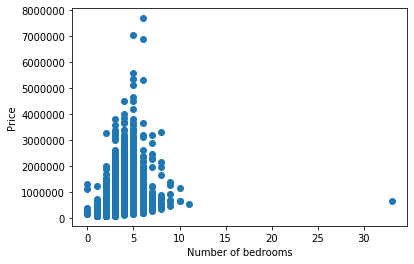

In [70]:
pyplot.scatter(features['bedrooms'],prices)
pyplot.ylabel('Price')
pyplot.xlabel('Number of bedrooms')

Text(0.5, 0, 'Number of bathrooms')

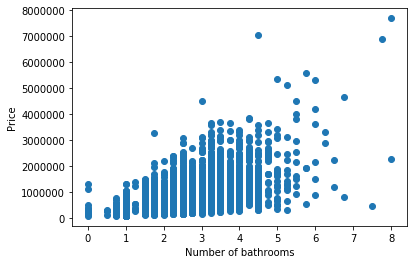

In [71]:
pyplot.scatter(features['bathrooms'],prices)
pyplot.ylabel('Price')
pyplot.xlabel('Number of bathrooms')

Text(0.5, 0, 'sqft_living')

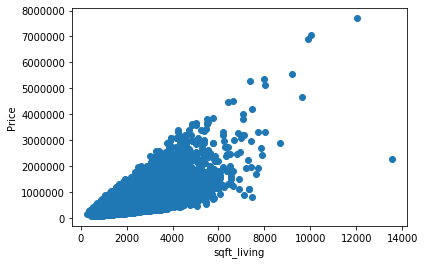

In [72]:
pyplot.scatter(features['sqft_living'],prices)
pyplot.ylabel('Price')
pyplot.xlabel('sqft_living')

Text(0.5, 0, ' yr_built')

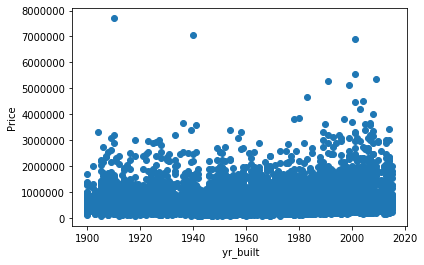

In [73]:
pyplot.scatter(features['yr_built'],prices)
pyplot.ylabel('Price')
pyplot.xlabel(' yr_built')

## 3 fold , divide the complete dataset between cross validation, testing and training


In [74]:
train1, test_CV1 = train_test_split(complete, test_size=0.4, random_state=0)
test1, CV1 = train_test_split(test_CV1,test_size=0.5, random_state=0)
ytrain1= train1.iloc[:,0]
Xtrain1= train1.iloc[:,1:]
ytest1= test1.iloc[:,0]
Xtest1= test1.iloc[:,1:]
yCV1= CV1.iloc[:,0]
XCV1= CV1.iloc[:,1:]

Xtrain1.reset_index(drop=True, inplace=True)
ytrain1.reset_index(drop=True, inplace=True)
Xtest1.reset_index(drop=True, inplace=True)
ytest1.reset_index(drop=True, inplace=True)
XCV1.reset_index(drop=True, inplace=True)
yCV1.reset_index(drop=True, inplace=True)

In [75]:
train2, test_CV2 = train_test_split(complete, test_size=0.4, random_state=10)
test2, CV2 = train_test_split(test_CV2,test_size=0.5, random_state=10)
ytrain2= train2.iloc[:,0]
Xtrain2= train2.iloc[:,1:]
ytest2= test2.iloc[:,0]
Xtest2= test2.iloc[:,1:]
yCV2= CV2.iloc[:,0]
XCV2= CV2.iloc[:,1:]

Xtrain2.reset_index(drop=True, inplace=True)
ytrain2.reset_index(drop=True, inplace=True)
Xtest2.reset_index(drop=True, inplace=True)
ytest2.reset_index(drop=True, inplace=True)
XCV2.reset_index(drop=True, inplace=True)
yCV2.reset_index(drop=True, inplace=True)

In [76]:
train3, test_CV3 = train_test_split(complete, test_size=0.4, random_state=20)
test3, CV3 = train_test_split(test_CV3,test_size=0.5, random_state=20)
ytrain3= train3.iloc[:,0]
Xtrain3= train3.iloc[:,1:]
ytest3= test3.iloc[:,0]
Xtest3= test3.iloc[:,1:]
yCV3= CV3.iloc[:,0]
XCV3= CV3.iloc[:,1:]

Xtrain3.reset_index(drop=True, inplace=True)
ytrain3.reset_index(drop=True, inplace=True)
Xtest3.reset_index(drop=True, inplace=True)
ytest3.reset_index(drop=True, inplace=True)
XCV3.reset_index(drop=True, inplace=True)
yCV3.reset_index(drop=True, inplace=True)

<a id="section2"></a>
## Data Normalization

In [77]:
def  featureNormalize(X):  
    # You need to set these values correctly
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm / sigma
    # ================================================================
    return X_norm, mu, sigma

## Hypothesis construction , Cost function and Gradient Descent computation

In [78]:
def hypothesis_cost_gradient(Xtrain, ytrain, theta, alpha, num_iters,power,lamb):
 
    # Initialize some useful values
    m = ytrain.shape[0] # number of training example
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    J = 0
    J_history = []
    
    df= Xtrain.copy();
    df['bedrooms'] = np.power((Xtrain['bedrooms']),power)
    df['bathrooms'] = np.power((Xtrain['bathrooms']),power)
    df['sqft_lot'] = np.power((Xtrain['sqft_lot']),power)
    df['lat'] = np.power((Xtrain['lat']),power)
    df['grade'] = np.power((Xtrain['grade']),power)
    df['sqft_basement'] = np.power((Xtrain['sqft_basement']),power)

    X_norm1, mu1, sigma1 = featureNormalize(df)
    d = pd.DataFrame(np.ones((X_norm1.shape[0], 1)))
    X_norm1.reset_index(drop=True, inplace=True)
    X = pd.concat([d,X_norm1], axis=1)

    for i in range(num_iters):
        h=np.dot(X,theta)
        theta=theta-(1.0/m)*(alpha)*(np.transpose(X).dot(h-np.transpose(ytrain))+(1.0*lamb/m)*(theta))      
        J = sum((h - ytrain)**2)/(2*m)+ ((lamb/(2.0*m)) * (np.sum(np.square(theta))))
        J_history.append(J)
    return theta, J_history


## Predict y and error

In [79]:
def  predict(X,theta,ycorrect): 
    
    d = pd.DataFrame(np.ones((X.shape[0], 1)))
    X1 = pd.concat([d,X], axis=1)
    ypredict = np.dot(X1, theta1)
    m = ypredict.shape[0]
    err = sum((ypredict - yCV1)**2)/(2*m)
    
    return ypredict, err

In [80]:
#lamb = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
lamb = [0,0.04,0.32,2.56,10.24]
num_iters = 400

<font size="90"><i><b><span style="color:red"> First fold</span> </b> </i> </font>


# HYPOTHESIS [1]

## Regularization and Cross Validation

In [81]:
predict1=[]
predict_error1=[]
alpha1 = 0.3
degree1=1

for i in range(len(lamb)):
    theta1 = np.zeros(Xtrain1.shape[1]+1)
    theta1, J_history1 = hypothesis_cost_gradient(Xtrain1, ytrain1, theta1, alpha1, num_iters,degree1,lamb[i])    
    # Cross Validation
    ypredict1, err1 = predict(XCV1,theta1,yCV1)
    predict1.append(ypredict1)
    predict_error1.append(err1)

## Cost - Gradient descent and plot

Text(0, 0.5, 'Cost J')

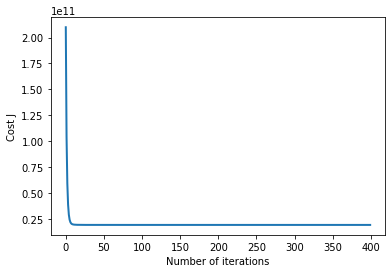

In [82]:
# Get Best lambda
index_min1 = np.argmin(predict_error1)
theta1 = np.zeros(Xtrain1.shape[1]+1)
theta1, J_history1 = hypothesis_cost_gradient(Xtrain1, ytrain1, theta1, alpha1, num_iters,degree1,lamb[index_min1])
# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history1)), J_history1, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## Testing error

In [83]:
yout1, error11 = predict(Xtest1,theta1,ytest1)
print("Test error:", error11)

Test error: 2.820057827512053e+18


# HYPOTHESIS [2]

## Regularization and Cross Validation

In [84]:
predict2=[]
predict_error2=[]
alpha2 =0.2
degree2=3

for i in range(len(lamb)):
    theta2 = np.zeros(Xtrain1.shape[1]+1)
    theta2, J_history2 = hypothesis_cost_gradient(Xtrain1, ytrain1, theta2, alpha2, num_iters,degree2,lamb[i])    
    # Cross Validation
    ypredict2, err2 = predict(XCV1,theta2,yCV1)
    predict2.append(ypredict2)
    predict_error2.append(err2)

## Cost - Gradient descent and plot

Text(0, 0.5, 'Cost J')

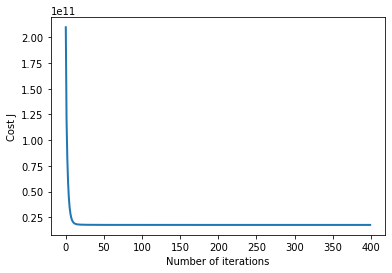

In [85]:
# Get Best lambda
index_min2 = np.argmin(predict_error2)
theta2 = np.zeros(Xtrain1.shape[1]+1)
theta2, J_history2 = hypothesis_cost_gradient(Xtrain1, ytrain1, theta2, alpha2, num_iters,degree2,lamb[index_min2])
# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## Testing error

In [86]:
yout2, error12 = predict(Xtest2,theta2,ytest2)
print("Test error:", error12)

Test error: 2.820416373985214e+18


# HYPOTHESIS [3]

## Regularization and Cross Validation

In [87]:
predict3=[]
predict_error3=[]
alpha3 = 0.4
degree=3

for i in range(len(lamb)):
    theta3 = np.zeros(Xtrain1.shape[1]+1)
    theta3, J_history3 = hypothesis_cost_gradient(Xtrain1, ytrain1, theta3, alpha3, num_iters,degree,lamb[i])    
    # Cross Validation
    ypredict3, err3 = predict(XCV1,theta3,yCV1)
    predict3.append(ypredict3)
    predict_error3.append(err3)

## Cost - Gradient descent and plot

Text(0, 0.5, 'Cost J')

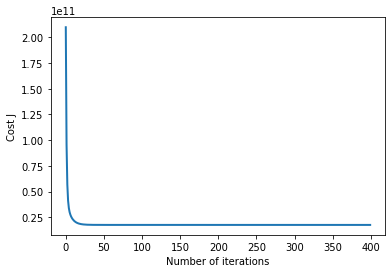

In [88]:
# Get Best lambda
index_min3 = np.argmin(predict_error3)
theta3 = np.zeros(Xtrain1.shape[1]+1)
theta3, J_history3 = hypothesis_cost_gradient(Xtrain1, ytrain1, theta3, alpha3, num_iters,degree,lamb[index_min3])
# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## Testing error

In [89]:
yout3, error13 = predict(Xtest1,theta3,ytest1)
print("Test error:", error13)

Test error: 2.820057827512053e+18


<font size="90"><i><b><span style="color:red"> Second fold</span> </b> </i> </font>


# HYPOTHESIS [1]

## Regularization and Cross Validation

In [90]:
predict1=[]
predict_error1=[]
alpha1 = 0.3
degree1=1

for i in range(len(lamb)):
    theta1 = np.zeros(Xtrain2.shape[1]+1)
    theta1, J_history1 = hypothesis_cost_gradient(Xtrain2, ytrain2, theta1, alpha1, num_iters,degree1,lamb[i])    
    # Cross Validation
    ypredict1, err1 = predict(XCV2,theta1,yCV2)
    predict1.append(ypredict1)
    predict_error1.append(err1)

## Cost - Gradient descent and plot

Text(0, 0.5, 'Cost J')

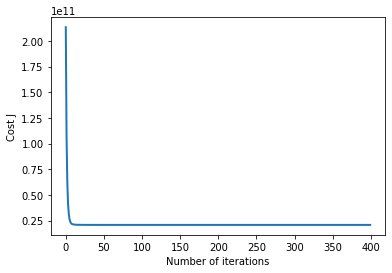

In [91]:
# Get Best lambda
index_min1 = np.argmin(predict_error1)
theta1 = np.zeros(Xtrain2.shape[1]+1)
theta1, J_history1 = hypothesis_cost_gradient(Xtrain2, ytrain2, theta1, alpha1, num_iters,degree1,lamb[index_min1])
# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history1)), J_history1, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## Testing error

In [92]:
yout1, error21 = predict(Xtest2,theta1,ytest2)
print("Test error:", error21)

Test error: 3.8167919582900224e+18


# HYPOTHESIS [2]

## Regularization and Cross Validation

In [93]:
predict2=[]
predict_error2=[]
alpha2 =0.2
degree2=3

for i in range(len(lamb)):
    theta2 = np.zeros(Xtrain2.shape[1]+1)
    theta2, J_history2 = hypothesis_cost_gradient(Xtrain2, ytrain2, theta2, alpha2, num_iters,degree2,lamb[i])    
    # Cross Validation
    ypredict2, err2 = predict(XCV1,theta2,yCV1)
    predict2.append(ypredict2)
    predict_error2.append(err2)

## Cost - Gradient descent and plot

Text(0, 0.5, 'Cost J')

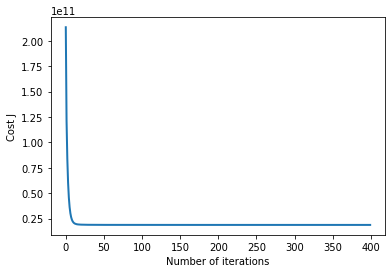

In [94]:
# Get Best lambda
index_min2 = np.argmin(predict_error2)
theta2 = np.zeros(Xtrain2.shape[1]+1)
theta2, J_history2 = hypothesis_cost_gradient(Xtrain2, ytrain2, theta2, alpha2, num_iters,degree2,lamb[index_min2])
# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## Testing error

In [95]:
yout2, error22 = predict(Xtest2,theta2,ytest2)
print("Test error:", error22)

Test error: 3.8167919582900224e+18


# HYPOTHESIS [3]

## Regularization and Cross Validation

In [96]:
predict3=[]
predict_error3=[]
alpha3 = 0.4
degree=3

for i in range(len(lamb)):
    theta3 = np.zeros(Xtrain2.shape[1]+1)
    theta3, J_history3 = hypothesis_cost_gradient(Xtrain2, ytrain2, theta3, alpha3, num_iters,degree,lamb[i])    
    # Cross Validation
    ypredict3, err3 = predict(XCV2,theta3,yCV2)
    predict3.append(ypredict3)
    predict_error3.append(err3)

## Cost - Gradient descent and plot

Text(0, 0.5, 'Cost J')

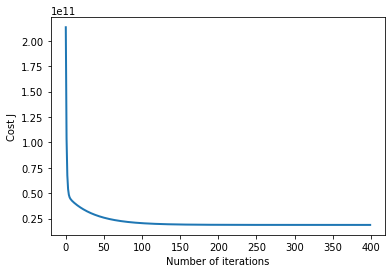

In [97]:
# Get Best lambda
index_min3 = np.argmin(predict_error3)
theta3 = np.zeros(Xtrain2.shape[1]+1)
theta3, J_history3 = hypothesis_cost_gradient(Xtrain2, ytrain2, theta3, alpha3, num_iters,degree,lamb[index_min3])
# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## Testing error

In [98]:
yout3, error23 = predict(Xtest2,theta3,ytest2)
print("Test error:", error23)

Test error: 3.8167919582900224e+18


<font size="90"><i><b><span style="color:red"> Third fold</span> </b> </i> </font>


# HYPOTHESIS [1]

## Regularization and Cross Validation

In [99]:
predict1=[]
predict_error1=[]
alpha1 = 0.3
degree1=1

for i in range(len(lamb)):
    theta1 = np.zeros(Xtrain3.shape[1]+1)
    theta1, J_history1 = hypothesis_cost_gradient(Xtrain3, ytrain3, theta1, alpha1, num_iters,degree1,lamb[i])    
    # Cross Validation
    ypredict1, err1 = predict(XCV3,theta1,yCV3)
    predict1.append(ypredict1)
    predict_error1.append(err1)

## Cost - Gradient descent and plot

Text(0, 0.5, 'Cost J')

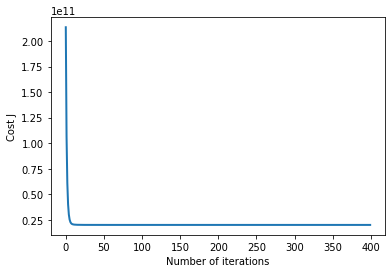

In [100]:
# Get Best lambda
index_min1 = np.argmin(predict_error1)
theta1 = np.zeros(Xtrain3.shape[1]+1)
theta1, J_history1 = hypothesis_cost_gradient(Xtrain3, ytrain3, theta1, alpha1, num_iters,degree1,lamb[index_min1])
# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history1)), J_history1, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## Testing error

In [101]:
yout1, error31 = predict(Xtest3,theta1,ytest3)
print("Test error:", error31)

Test error: 4.587843278991094e+18


# HYPOTHESIS [2]

## Regularization and Cross Validation

In [102]:
predict2=[]
predict_error2=[]
alpha2 =0.2
degree2=3

for i in range(len(lamb)):
    theta2 = np.zeros(Xtrain3.shape[1]+1)
    theta2, J_history2 = hypothesis_cost_gradient(Xtrain3, ytrain3, theta2, alpha2, num_iters,degree2,lamb[i])    
    # Cross Validation
    ypredict2, err2 = predict(XCV3,theta2,yCV3)
    predict2.append(ypredict2)
    predict_error2.append(err2)

## Cost - Gradient descent and plot

Text(0, 0.5, 'Cost J')

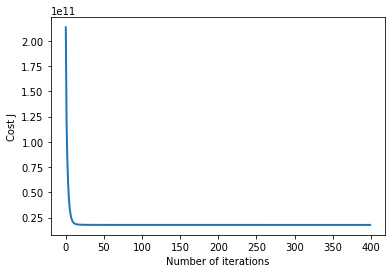

In [103]:
# Get Best lambda
index_min2 = np.argmin(predict_error2)
theta2 = np.zeros(Xtrain3.shape[1]+1)
theta2, J_history2 = hypothesis_cost_gradient(Xtrain3, ytrain3, theta2, alpha2, num_iters,degree2,lamb[index_min2])
# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## Testing error

In [104]:
youyt2, error32 = predict(Xtest3,theta2,ytest3)
print("Test error:", error32)

Test error: 4.587843278991094e+18


# HYPOTHESIS [3]

## Regularization and Cross Validation

In [105]:
predict3=[]
predict_error3=[]
alpha3 = 0.4
degree=3

for i in range(len(lamb)):
    theta3 = np.zeros(Xtrain3.shape[1]+1)
    theta3, J_history3 = hypothesis_cost_gradient(Xtrain3, ytrain3, theta3, alpha3, num_iters,degree,lamb[i])    
    # Cross Validation
    ypredict3, err3 = predict(XCV3,theta3,yCV3)
    predict3.append(ypredict3)
    predict_error3.append(err3)

## Cost - Gradient descent and plot

Text(0, 0.5, 'Cost J')

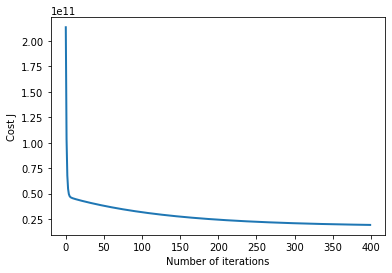

In [106]:
# Get Best lambda
index_min3 = np.argmin(predict_error3)
theta3 = np.zeros(Xtrain3.shape[1]+1)
theta3, J_history3 = hypothesis_cost_gradient(Xtrain3, ytrain3, theta3, alpha3, num_iters,degree,lamb[index_min3])
# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

## Testing error

In [107]:
yout3, error33 = predict(Xtest3,theta3,ytest3)
print("Test error:", error33)

Test error: 4.587843278991094e+18


In [108]:



print("Test error fold 1 hyp1:", error11)
print("Test error fold 1 hyp2:", error12)
print("Test error fold 1 hyp3:", error13)

print("Test error fold 2 hyp1:", error21)
print("Test error fold 2 hyp2:", error22)
print("Test error fold 2 hyp3:", error23)

print("Test error fold 3 hyp1:", error31)
print("Test error fold 3 hyp2:", error32)
print("Test error fold 3 hyp3:", error33)


Test error fold 1 hyp1: 2.820057827512053e+18
Test error fold 1 hyp2: 2.820416373985214e+18
Test error fold 1 hyp3: 2.820057827512053e+18
Test error fold 2 hyp1: 3.8167919582900224e+18
Test error fold 2 hyp2: 3.8167919582900224e+18
Test error fold 2 hyp3: 3.8167919582900224e+18
Test error fold 3 hyp1: 4.587843278991094e+18
Test error fold 3 hyp2: 4.587843278991094e+18
Test error fold 3 hyp3: 4.587843278991094e+18
